In [0]:
# connecting google drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# setup
**credit_card_balance**: 
- monthly data about previous credit cards clients have had with Home Credit. 
- Each row is one month of a credit card balance, and a single credit card can have many rows.

In [0]:
import os
import gc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
df_cc_balance = pd.read_csv(os.path.join(DATA_DIRECTORY, 'credit_card_balance.csv'), nrows= None)
df_cc_balance.head()


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [0]:
df_cc_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    int64
SK_ID_CURR                    int64
MONTHS_BALANCE                int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL       int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS          object
SK_DPD                        int64
SK_DPD_DEF                    int64
dtypes: float64(15), int64(7

In [0]:
def statistical_analyzing(df_input):
  """
  This function assits to expand Exploratory Data Analysis (EDA) is an open-ended 
  process where we calculate statistics and make figures to find trends, anomalies,
  patterns, or relationships within the data. The goal of EDA is to learn what our
  data can tell us. It generally starts out with a high level overview, 
  then narrows in to specific areas as we find intriguing areas of the data. """
  # check number of rows, cols
  no_rows = df_input.shape[0]
  no_cols = df_input.shape[1]
  print("No. observations:", no_rows )
  print("No. features:", no_cols )
  
  # checking type of features
  name = []
  cols_type = []
  for n,t in df_input.dtypes.iteritems():
    name.append(n)
    cols_type.append(t)
    
  # checking distinction (unique values) of features
  ls_unique = []
  for cname in df_input.columns:
    try:
      nunique = df_input[cname].nunique()
      pct_unique = nunique*100.0/ no_rows
      ls_unique.append("{} ({:0.2f}%)".format(nunique, pct_unique))
    except:
      ls_unique.append("{} ({:0.2f}%)".format(0,0))
      continue
  # checking missing values of features
  ls_miss = []
  for cname in df_input.columns:
    try:
      nmiss = df_input[cname].isnull().sum()
      pct_miss = nmiss*100.0/ no_rows
      ls_miss.append("{} ({:0.2f}%)".format(nmiss, pct_miss))
    except:
      ls_miss.append("{} ({:0.2f}%)".format(0,0))
      continue 
      
  # checking zeros
  ls_zeros = []
  for cname in df_input.columns:
    try:
      nzeros = (df_input[cname] == 0).sum()
      pct_zeros = nzeros * 100.0/ no_rows
      ls_zeros.append("{} ({:0.2f}%)".fornat(nzeros, pct_zeros))
    except:
      ls_zeros.append("{} ({:0.2f}%)".format(0,0))
      continue
      
  # checking negative values
  ls_neg = []
  for cname in df_input.columns:
    try:
      nneg = (df_input[cname].astype("float")<0).sum()
      pct_neg =nneg * 100.0 / no_rows
      ls_neg.append("{} ({:0.2f}%)".format(nneg, pct_neg))
    except:
      ls_neg.append("{} ({:0.2f}%)".format(0,0))
      continue
      
  # extracting the output
  data = {
      "name": name,
      "col_type": cols_type,
      "n_unique": ls_unique,
      "n_miss": ls_miss,
      "n_zeros":ls_zeros,
      "n_neg":ls_neg      
  }
  
  # statistical info
  df_stats = df_input.describe().transpose()
  ls_stats = []
  for stat in df_stats.columns:
    data[stat] = []
    for cname in df_input.columns:
      try:
        data[stat].append(df_stats.loc[cname, stat])
      except:
        data[stat].append(0.0)
        
  # take samples
  df_sample = df_input.sample(frac = .5).head().transpose()
  df_sample.columns = ["sample_{}".format(i) for i in range(5)]
  
  # repair the output
  col_ordered = ["name","col_type","n_unique","n_miss","n_zeros","n_neg",
                "25%","50%","75%","count","max","mean","min","std"]
  df_data = pd.DataFrame(data, columns = col_ordered).set_index("name")
  df_data = pd.concat([df_data, df_sample], axis = 1)
  
  return df_data   

In [0]:
def plot_categorical(cols, target, df):
  for col in cols:
    if target == None:
      sns.countplot(x=col, data=df[[col]] ,  palette="Reds_d")      
    else:
      print('Column name: %s' %col)
      sns.countplot(x=col, hue=target, data=df[[col,target]], palette="Reds_d")
      #sns.barplot(x=col, y=target, data=df[[col,target]]
      #        , palette="Reds_d", estimator = sum)
      plt.legend()
    plt.xticks(rotation=90)#-60    
    plt.show()

"""Plotting the continous features :    
1. A box plot (or box-and-whisker plot) shows the distribution of quantitative data 
in a way that facilitates comparisons between variables.
2. Distribution graph :to check the linearity of the variables and look 
for skewness of features."""
def plot_continous(cols, target, df):
  # Using boxplot to analyze the continous feature
  for col in cols:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    if target == None:
      plot = sns.boxplot(col, whis=1.5, data=df)
    else:
      plot = sns.boxplot(x=target, y=col, whis=1.5, data=df)
      plt.legend()
    # which defined as the proportion of the IQR past the low and high quartiles to extend the plot whiskers 
    # or interquartile range (IQR)
    # therefore, maximum = Q3 + 1.5*IQR , min = Q1 - 1.5*IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('Column name: %s' %col)    
    print('> No.outliner: %d \n' %((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum())
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[col].dropna())#.hist(bins=20)
    fig.set_ylabel('Volumn')
    fig.set_xlabel(col)    
    plt.show() 

In [0]:
cate_cols = [col for col in df_cc_balance.columns if df_cc_balance[col].dtype == 'object']
# cate_cols.remove('DAYS_DECISION')
# cate_cols.append('NFLAG_INSURED_ON_APPROVAL')

cons_cols = list(set(df_cc_balance.columns) - set(cate_cols))

# key

In [0]:
statistical_analyzing(df_cc_balance[["SK_ID_CURR","SK_ID_PREV"]])

No. observations: 3840312
No. features: 2


,col_type,n_unique,n_miss,n_zeros,n_neg,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4
name,,,,,,,,,,,,,,,,,,
SK_ID_CURR,int64,103558 (2.70%),0 (0.00%),0 (0.00%),0 (0.00%),189517.0,278396.0,367580.00,3840312.0,456250.0,2.783242e+05,100006.0,102704.475133,163601,243514,107959,214145,237854
SK_ID_PREV,int64,104307 (2.72%),0 (0.00%),0 (0.00%),0 (0.00%),1434385.0,1897122.0,2369327.75,3840312.0,2843496.0,1.904504e+06,1000018.0,536469.470563,2220424,1730094,1150596,2788884,1570569


#categorical

In [0]:
cate_cols = list(cate_cols)
cate_cols.sort()
df_explore_cate = statistical_analyzing(df_cc_balance[cate_cols])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(cate_cols)
  print(df_explore_cate)

No. observations: 3840312
No. features: 1
['NAME_CONTRACT_STATUS']
                     col_type   n_unique     n_miss    n_zeros      n_neg  \
name                                                                        
NAME_CONTRACT_STATUS   object  7 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)   

                      25%  50%  75%    count  max mean  min  std sample_0  \
name                                                                        
NAME_CONTRACT_STATUS  NaN  NaN  NaN  3840312  NaN  NaN  NaN  NaN   Active   

                     sample_1 sample_2 sample_3 sample_4  
name                                                      
NAME_CONTRACT_STATUS   Active   Active   Active   Active  


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


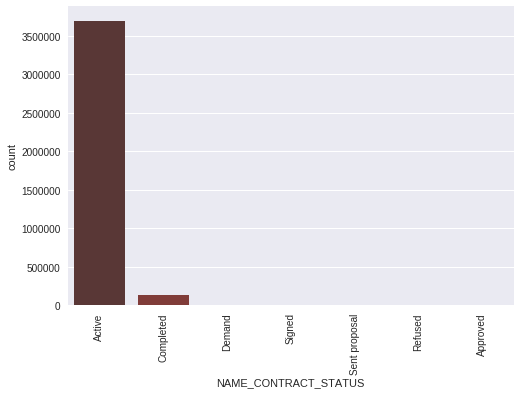

In [0]:
plot_categorical(cate_cols,None,df_cc_balance)

#continous

In [0]:
cons_cols.sort()
statistical_analyzing(df_cc_balance[cons_cols])
# df_explore_cate = statistical_analyzing(df_cc_balance[cons_cols])
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#   print(cons_cols)
#   print(df_explore_cate)


No. observations: 3840312
No. features: 22


,col_type,n_unique,n_miss,n_zeros,n_neg,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4
name,,,,,,,,,,,,,,,,,,
AMT_BALANCE,float64,1347904 (35.10%),0 (0.00%),0 (0.00%),2345 (0.06%),0.00,0.0,8.904669e+04,3840312.0,1505902.185,5.830016e+04,-420250.185,106307.031024,99958.905,0.0,0.00,284.58,111196.89
AMT_CREDIT_LIMIT_ACTUAL,int64,181 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),45000.00,112500.0,1.800000e+05,3840312.0,1350000.000,1.538080e+05,0.000,165145.699525,450000.000,450000.0,45000.00,67500.00,360000.00
AMT_DRAWINGS_ATM_CURRENT,float64,2267 (0.06%),749816 (19.52%),0 (0.00%),1 (0.00%),0.00,0.0,0.000000e+00,3090496.0,2115000.000,5.961325e+03,-6827.310,28225.688578,22500.000,0.0,0.00,0.00,99000.00
AMT_DRAWINGS_CURRENT,float64,187005 (4.87%),0 (0.00%),0 (0.00%),3 (0.00%),0.00,0.0,0.000000e+00,3840312.0,2287098.315,7.433388e+03,-6211.620,33846.077333,22500.000,0.0,0.00,0.00,105404.85
AMT_DRAWINGS_OTHER_CURRENT,float64,1832 (0.05%),749816 (19.52%),0 (0.00%),0 (0.00%),0.00,0.0,0.000000e+00,3090496.0,1529847.000,2.881696e+02,0.000,8201.989345,0.000,0.0,0.00,0.00,0.00
AMT_DRAWINGS_POS_CURRENT,float64,168748 (4.39%),749816 (19.52%),0 (0.00%),0 (0.00%),0.00,0.0,0.000000e+00,3090496.0,2239274.160,2.968805e+03,0.000,20796.887047,0.000,0.0,0.00,0.00,6404.85
AMT_INST_MIN_REGULARITY,float64,312266 (8.13%),305236 (7.95%),0 (0.00%),0 (0.00%),0.00,0.0,6.633911e+03,3535076.0,202882.005,3.540204e+03,0.000,5600.154122,4258.980,NaN,0.00,0.00,0.00
AMT_PAYMENT_CURRENT,float64,163209 (4.25%),767988 (20.00%),0 (0.00%),0 (0.00%),152.37,2702.7,9.000000e+03,3072324.0,4289207.445,1.028054e+04,0.000,36078.084953,13500.000,NaN,3668.22,0.00,NaN
AMT_PAYMENT_TOTAL_CURRENT,float64,182957 (4.76%),0 (0.00%),0 (0.00%),0 (0.00%),0.00,0.0,6.750000e+03,3840312.0,4278315.690,7.588857e+03,0.000,32005.987768,13500.000,0.0,0.00,0.00,0.00


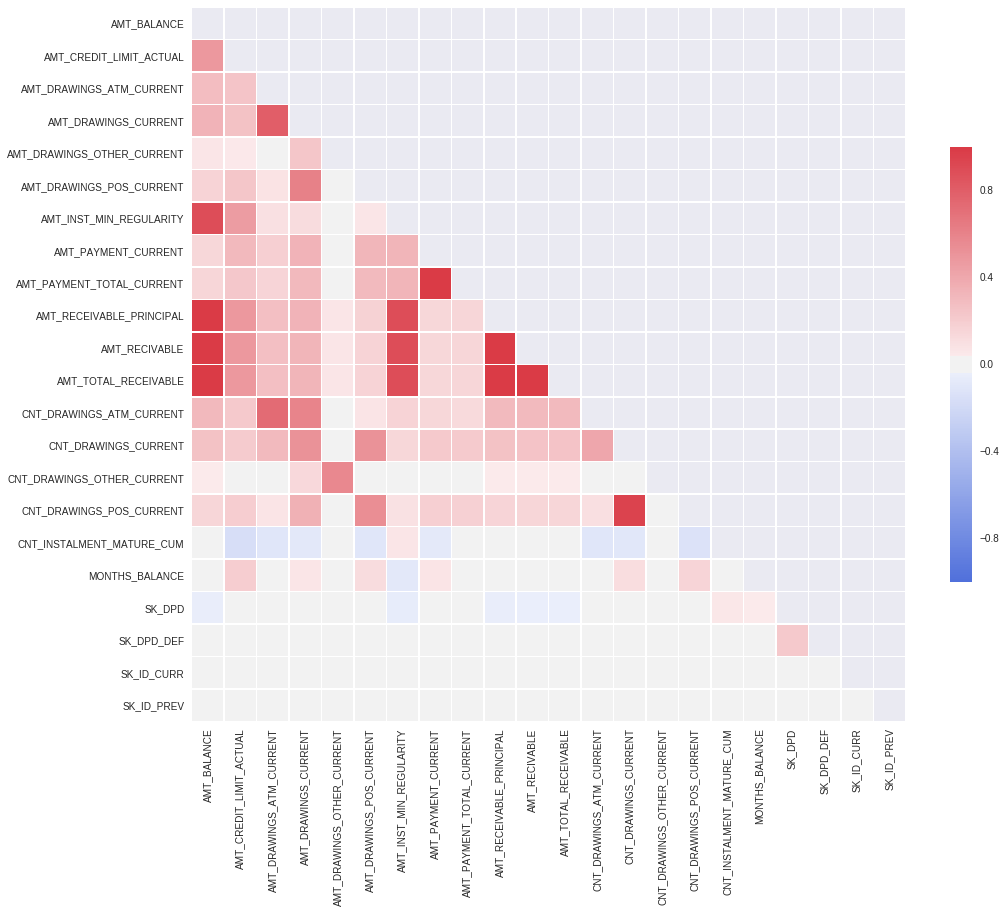

In [0]:
correlations = df_cc_balance[cons_cols].corr()

# Using seaborn package
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmin = -1, vmax= 1 , center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#correlations

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Column name: AMT_BALANCE
> No.outliner: 248146 



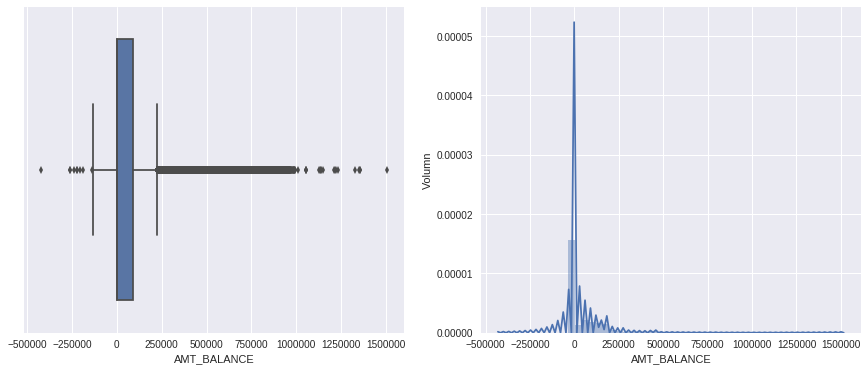

Column name: AMT_CREDIT_LIMIT_ACTUAL
> No.outliner: 404927 



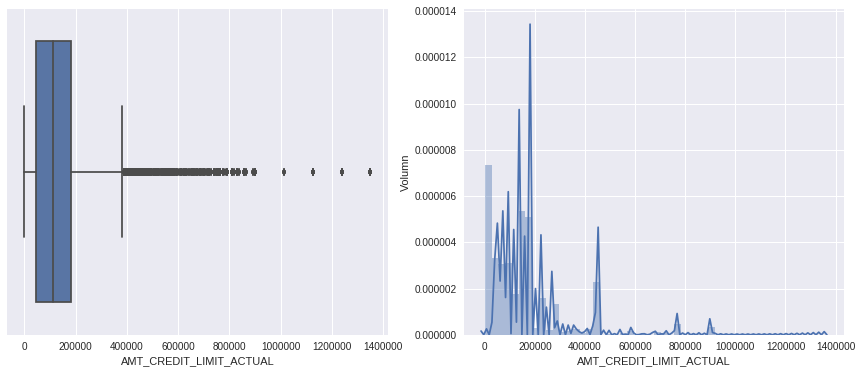

Column name: AMT_DRAWINGS_ATM_CURRENT
> No.outliner: 424778 



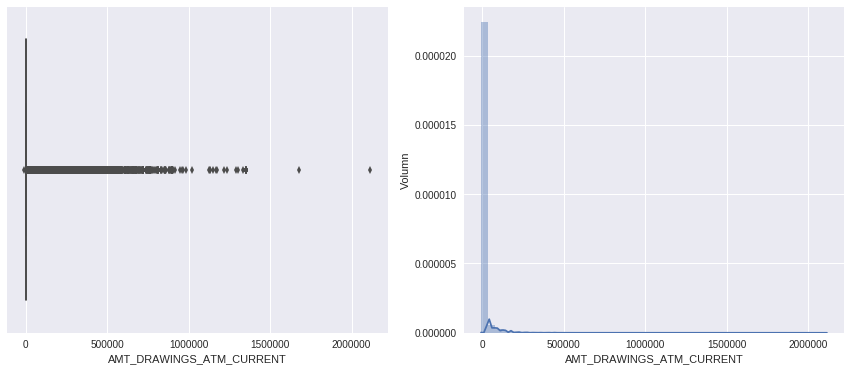

Column name: AMT_DRAWINGS_CURRENT
> No.outliner: 616869 



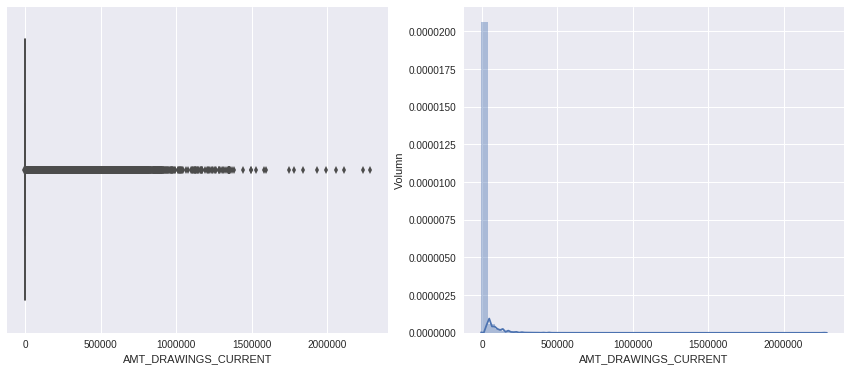

Column name: AMT_DRAWINGS_OTHER_CURRENT
> No.outliner: 12333 



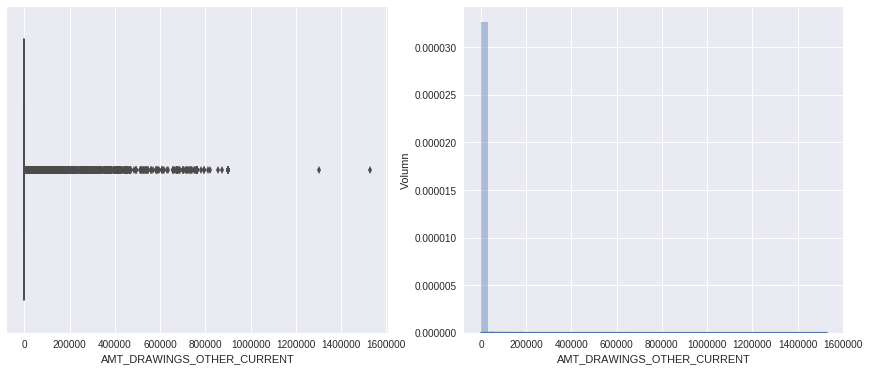

Column name: AMT_DRAWINGS_POS_CURRENT
> No.outliner: 264901 



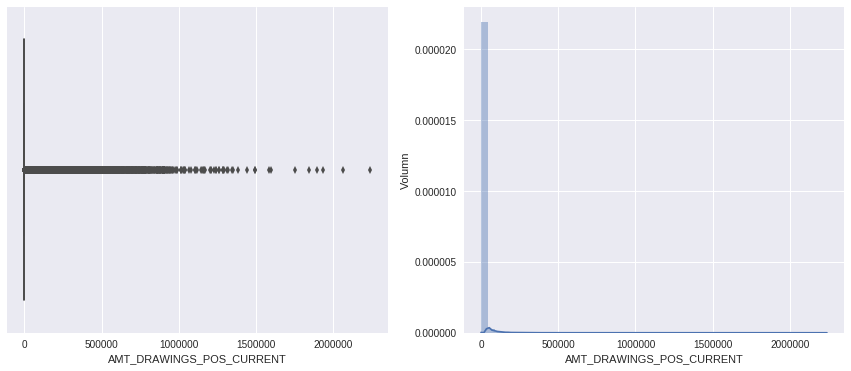

Column name: AMT_INST_MIN_REGULARITY
> No.outliner: 124489 



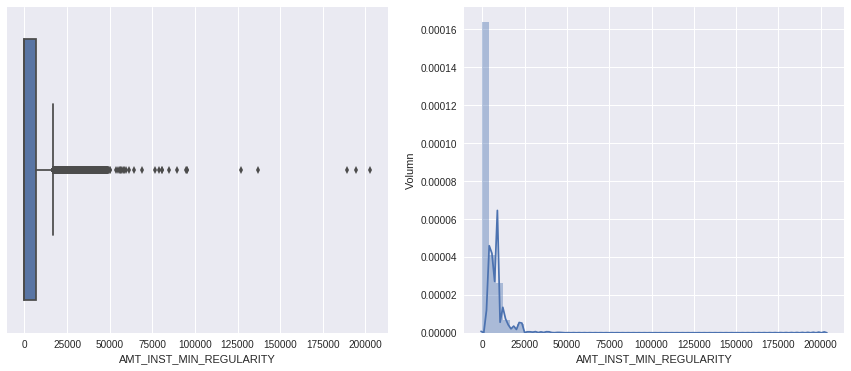

Column name: AMT_PAYMENT_CURRENT
> No.outliner: 282428 



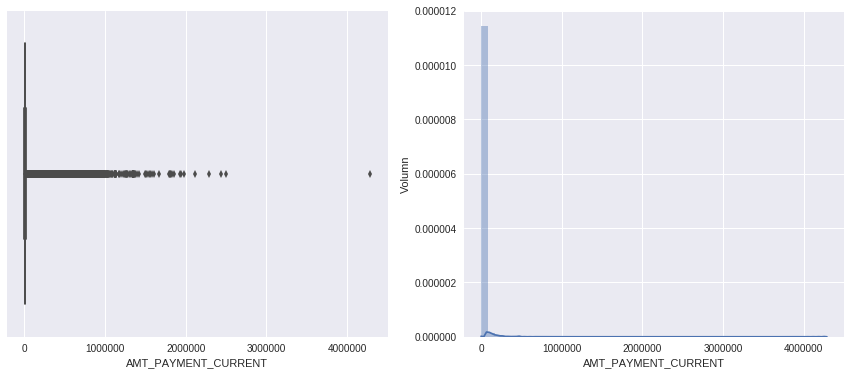

Column name: AMT_PAYMENT_TOTAL_CURRENT
> No.outliner: 324742 



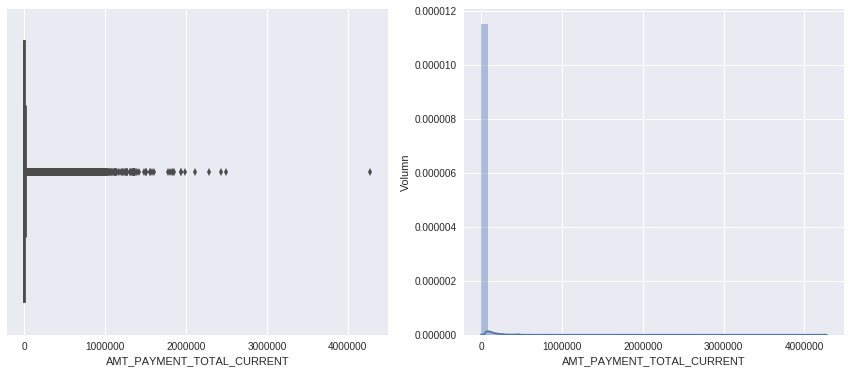

Column name: AMT_RECEIVABLE_PRINCIPAL
> No.outliner: 250529 



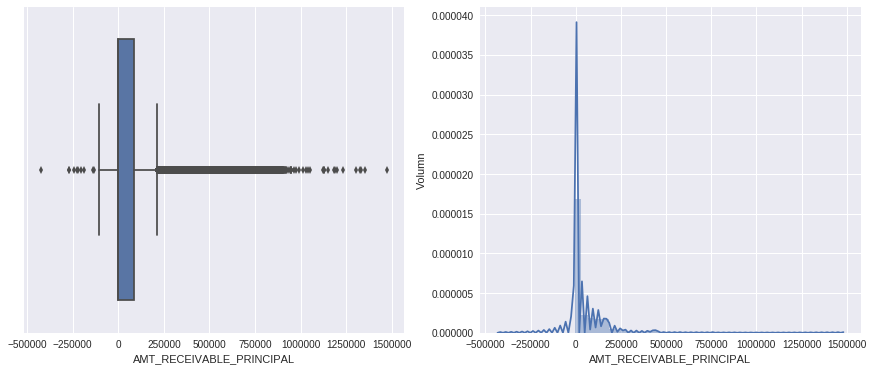

Column name: AMT_RECIVABLE
> No.outliner: 247510 



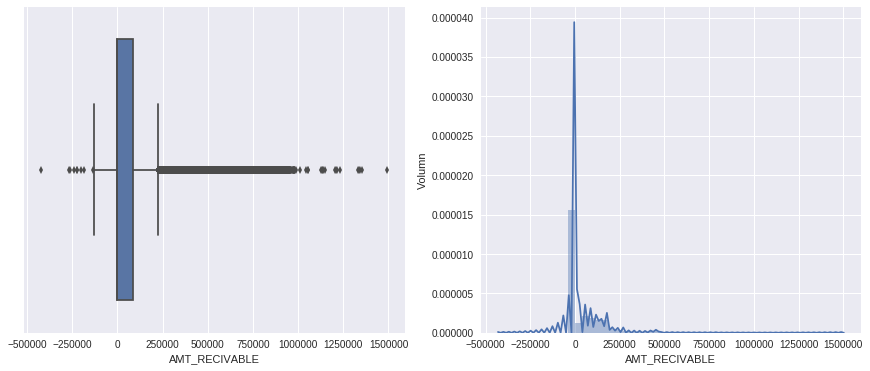

Column name: AMT_TOTAL_RECEIVABLE
> No.outliner: 247473 



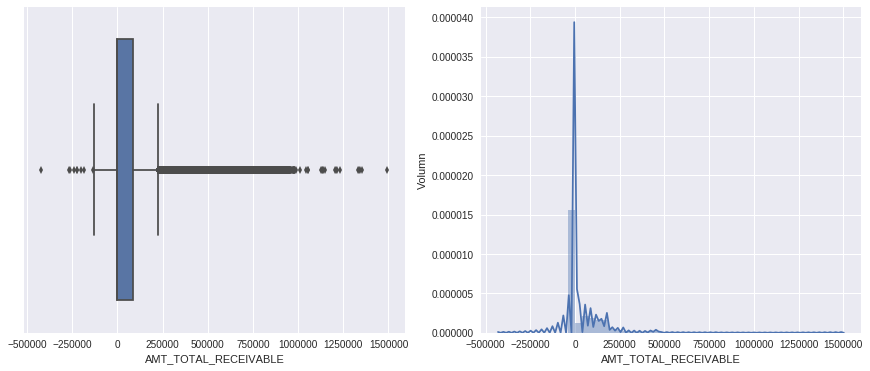

Column name: CNT_DRAWINGS_ATM_CURRENT
> No.outliner: 424778 



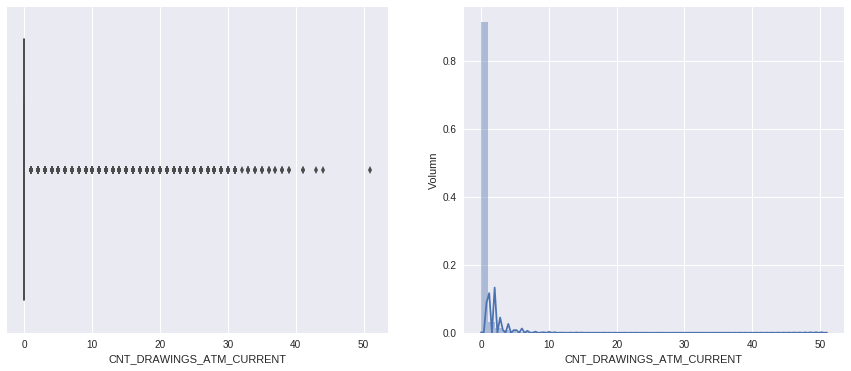

Column name: CNT_DRAWINGS_CURRENT
> No.outliner: 610360 



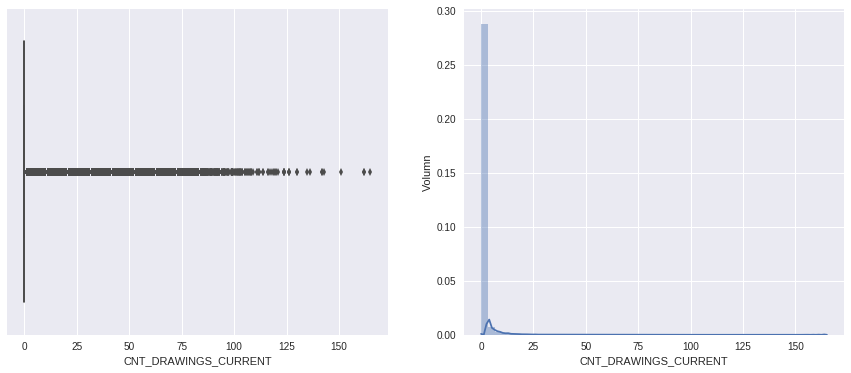

Column name: CNT_DRAWINGS_OTHER_CURRENT
> No.outliner: 12808 



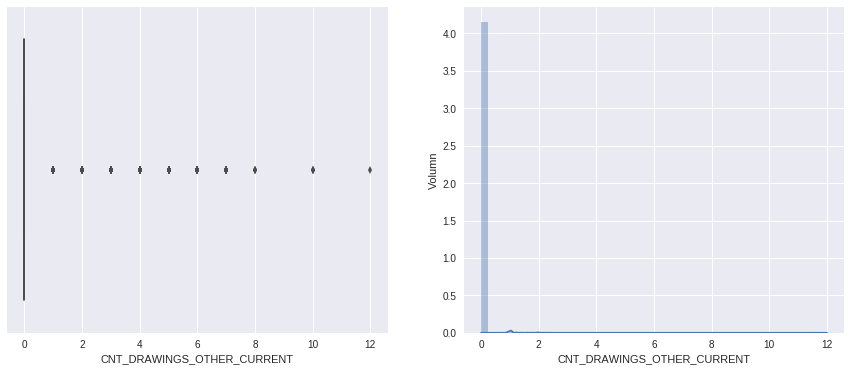

Column name: CNT_DRAWINGS_POS_CURRENT
> No.outliner: 264902 



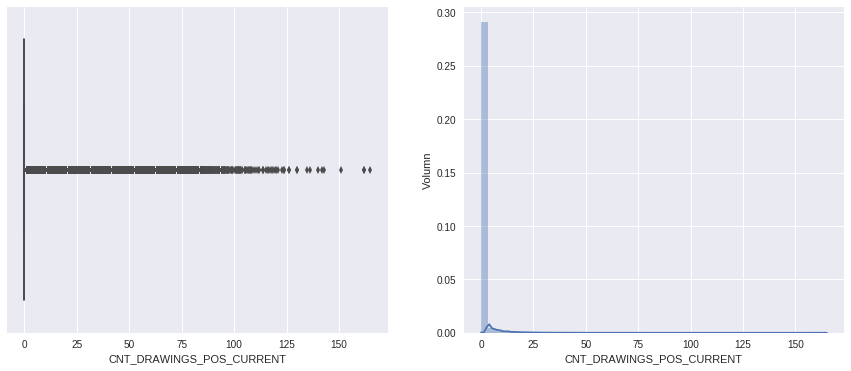

Column name: CNT_INSTALMENT_MATURE_CUM
> No.outliner: 58845 



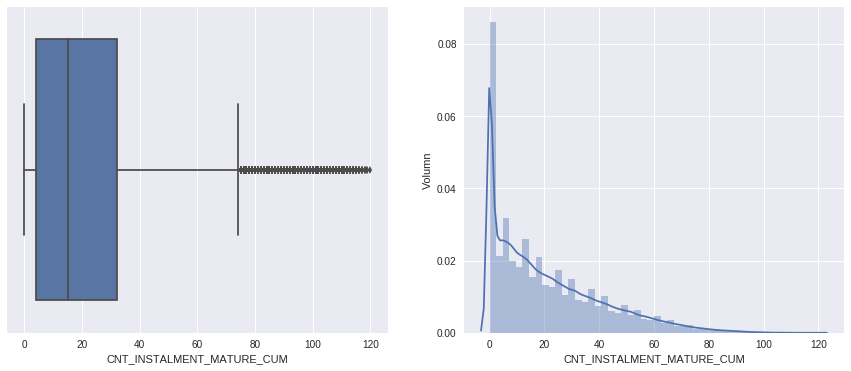

Column name: MONTHS_BALANCE
> No.outliner: 0 



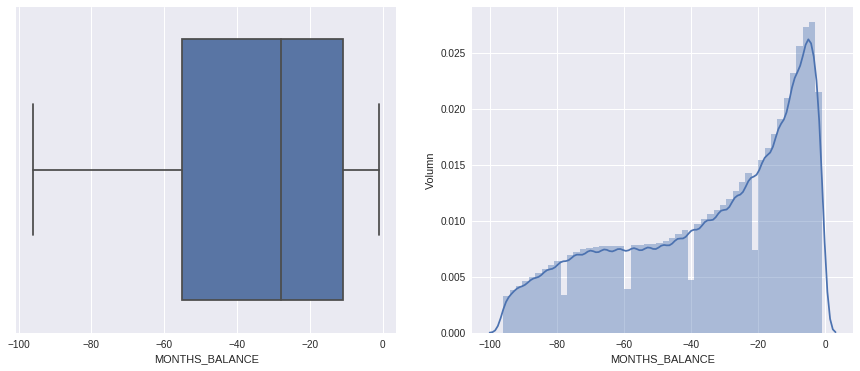

Column name: SK_DPD
> No.outliner: 153355 



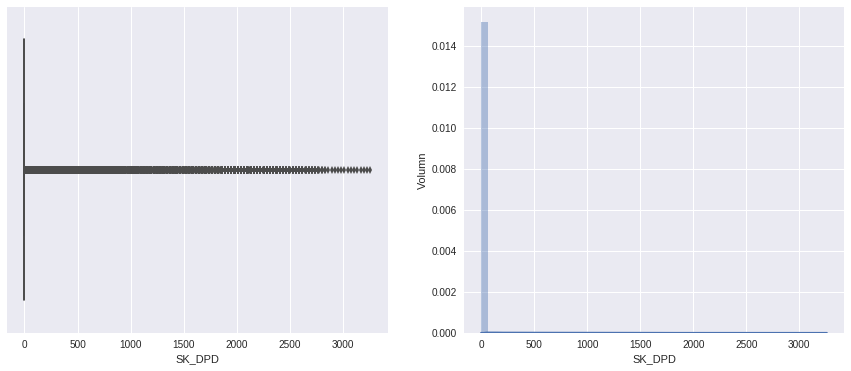

Column name: SK_DPD_DEF
> No.outliner: 89340 



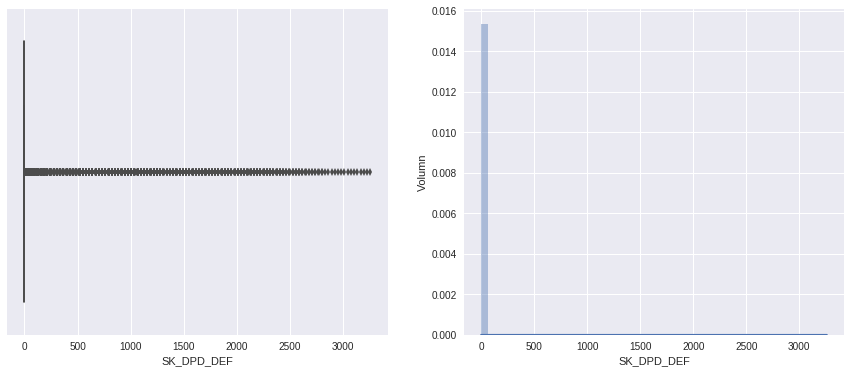

Column name: SK_ID_CURR
> No.outliner: 0 



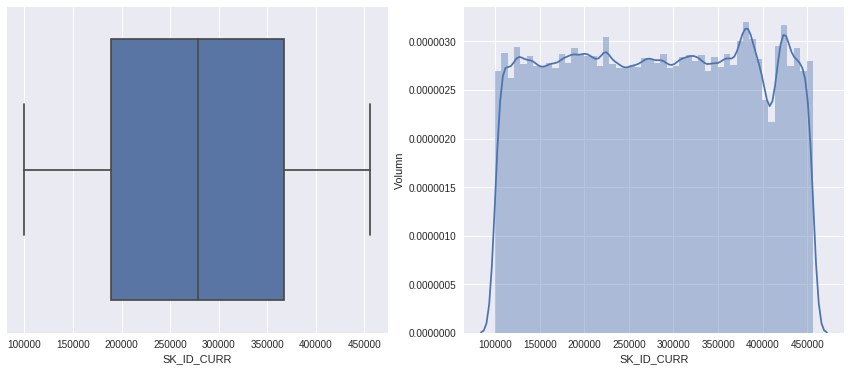

Column name: SK_ID_PREV
> No.outliner: 0 



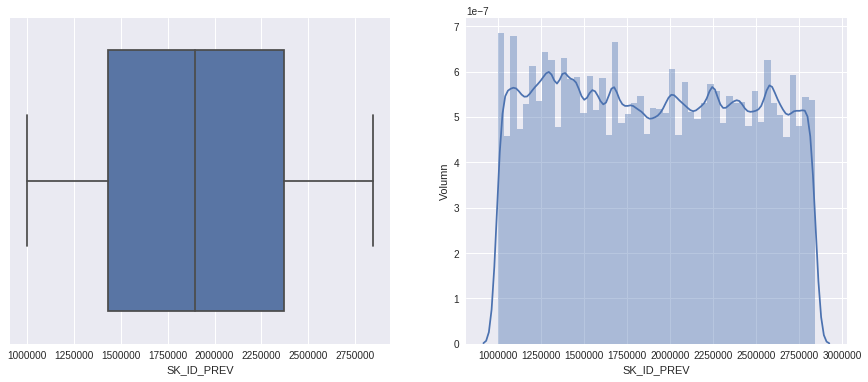

In [0]:
cols = cons_cols
plot_continous(cols, None, df_cc_balance)



# Cleaning
- This is external data (without TARGET feature), removing outliers do not bring to much meaning.
- Doing feature selection

In [0]:
def one_hot_encoder(df, categorical_columns=None, nan_as_category=True):
  """Create a new column for each categorical value in categorical columns. """
  original_columns = list(df.columns)
  if not categorical_columns:# if not auto "ohe" object-type features
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
  categorical_columns = [c for c in df.columns if c not in original_columns]
  return df, categorical_columns

def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping by SK_ID_CURR with formated aggregations """
  agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
  # change columns names
  agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                             for e in agg_df.columns.tolist()])
  return agg_df.reset_index()

def group_and_merge(df_to_agg, df_to_merge, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping to generate new feature and then merging into origin df"""
  agg_df = group(df_to_agg, prefix, aggregations, aggregate_by= aggregate_by)
  return df_to_merge.merge(agg_df, how='left', on= aggregate_by)
  

In [0]:
def get_credit_card(path, num_rows= None):
  """ Process credit_card_balance.csv and return a pandas dataframe. """
  cc = pd.read_csv(os.path.join(path, 'credit_card_balance.csv'), nrows= num_rows)
  #ohe_columns = [col for col in cc.columns if cc[col].dtype == 'object']
  cc, cat_cols = one_hot_encoder(cc, nan_as_category=False)
  
  # Aggregations by SK_ID_CURR
  # Categorical features
  cat_agg = {key: ['mean'] for key in cat_cols}
  
  CREDIT_CARD_AGG = {  
      'SK_ID_PREV': ['nunique'],
      'MONTHS_BALANCE': ['min'],
      'AMT_BALANCE': ['max'],
      'AMT_CREDIT_LIMIT_ACTUAL': ['max'],
      'AMT_DRAWINGS_OTHER_CURRENT': ['max', 'sum'],      
      'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
      'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
      'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
      
      'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
      'AMT_PAYMENT_TOTAL_CURRENT': ['max', 'mean', 'sum', 'var'],
      'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
      
      'AMT_PAYMENT_CURRENT': ['max', 'sum'],
      
      'CNT_DRAWINGS_ATM_CURRENT': ['max', 'mean', 'sum'],
      'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
      'CNT_DRAWINGS_POS_CURRENT': ['mean'],
      'CNT_DRAWINGS_OTHER_CURRENT': ['max', 'mean', 'sum'],
      'CNT_INSTALMENT_MATURE_CUM': ['mean'], 
 
      'SK_DPD': ['mean', 'max', 'sum'],
      'SK_DPD_DEF': ['max', 'sum'],}

  
  cc_agg = group(cc, 'CC_', {**CREDIT_CARD_AGG, **cat_agg})

  return cc_agg

    

In [0]:
# cols = [f for f in cc_agg.columns if 'CC_NAME_CONTRACT_STATUS_' in f]
# statistical_analyzing(cc_agg[cols])



# FE
**credit_card_balance**: 
- Contains 3,840,312 entries, total 23 columns
- monthly data about previous credit cards clients have had with Home Credit. 
- Each row is one month of a credit card balance, and a single credit card can have many rows.

**FE**
- Feature Selection is done
- Feature extraction
  - Generating features based on internal data
  - Generating features based on external data
- Domain knowledge features




In [0]:
""" INITIAL FEATURES
NAME_CONTRACT_STATUS tình trạng hợp đồng, phần lớn ở dạng Active 

'AMT_BALANCE', tiền trong thẻ
'AMT_CREDIT_LIMIT_ACTUAL', tiền giới hạn thực sự

'AMT_DRAWINGS_ATM_CURRENT', trích trước "rút" từ ATM hiện tại
'AMT_DRAWINGS_CURRENT', trích trước hiện tại
'AMT_DRAWINGS_OTHER_CURRENT', các khoảng trích trước khác
'AMT_DRAWINGS_POS_CURRENT',

'AMT_INST_MIN_REGULARITY', chi trả nhỏ nhất
'AMT_PAYMENT_CURRENT', chi trả hiện tại
'AMT_PAYMENT_TOTAL_CURRENT', tổng chi trả

'AMT_RECEIVABLE_PRINCIPAL', khoảng nhận theo hợp đồng significant correlated 
to AMT_TOTAL_RECEIVABLE ...
'AMT_RECIVABLE', * significant correlated to AMT_TOTAL_RECEIVABLE...
'AMT_TOTAL_RECEIVABLE', tổng các khoảng khả nhận choose this feature in 3 cols 
of "RECEIVABLE group"

'CNT_DRAWINGS_ATM_CURRENT', đếm số lần rút từ ATM
'CNT_DRAWINGS_CURRENT', đếm số lần rút 
'CNT_DRAWINGS_OTHER_CURRENT', đếm số lần rút khác
'CNT_DRAWINGS_POS_CURRENT', * 20% missing value, significant correlated 
to CNT_DRAWINGS_CURRENT 
'CNT_INSTALMENT_MATURE_CUM',  đếm số lần trả góp dồn

'MONTHS_BALANCE', số tháng đếm theo thứ tự lùi đến ngày đáo hạn -1,-2,-3...., 
max -1, min = -96(8 years) 
'SK_DPD',
'SK_DPD_DEF',
"""

In [0]:
""" DOMAIN KNOWLEDGE FEATURES
LIMIT_USE_RATIO
PAYMENT_TO_MIN_RATIO

AMT_TOTAL_DRAWING
TDRAWING_LIMIT_RATIO
DRAWING_LIMIT_RATIO
TDRAWING_TPAYMENT_RATIO
TDRAWING_BALANCE_RATIO

FLAG_LATE_PAYMENT
"""

In [0]:
# Domain knowledge features
cc = df_cc_balance.copy()
# Amount used from the limited amount of cc
cc['LIMIT_USE_RATIO'] = cc['AMT_BALANCE'] / cc['AMT_CREDIT_LIMIT_ACTUAL']

# Current payment / Min payment
cc['PAYMENT_TO_MIN_RATIO'] = cc['AMT_PAYMENT_CURRENT'] / cc['AMT_INST_MIN_REGULARITY']

# Total Drawing amount
cc['AMT_TOTAL_DRAWING'] = (cc['AMT_DRAWINGS_ATM_CURRENT'] + cc['AMT_DRAWINGS_CURRENT'] 
                           + cc['AMT_DRAWINGS_OTHER_CURRENT'] + cc['AMT_DRAWINGS_POS_CURRENT'])
# Total drawing / credit limit
cc['TDRAWING_LIMIT_RATIO'] = cc['AMT_TOTAL_DRAWING'] / cc['AMT_CREDIT_LIMIT_ACTUAL']
# How much drawing of limit
cc['DRAWING_LIMIT_RATIO'] = cc['AMT_DRAWINGS_ATM_CURRENT'] / cc['AMT_CREDIT_LIMIT_ACTUAL']
# total drawing / total payment
cc['TDRAWING_TPAYMENT_RATIO'] = cc['AMT_TOTAL_DRAWING'] / cc['AMT_PAYMENT_TOTAL_CURRENT']
# total drawing / balance
cc['TDRAWING_BALANCE_RATIO'] = cc['AMT_TOTAL_DRAWING'] / cc['AMT_BALANCE']

# Late payment
cc['FLAG_LATE_PAYMENT'] = cc['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)

In [0]:
cc['LIMIT_USE_RATIO']

In [0]:
cols = ['LIMIT_USE_RATIO','PAYMENT_TO_MIN_RATIO','AMT_TOTAL_DRAWING','TDRAWING_LIMIT_RATIO'
        ,'DRAWING_LIMIT_RATIO','TDRAWING_TPAYMENT_RATIO','TDRAWING_BALANCE_RATIO'
        ,'FLAG_LATE_PAYMENT']
statistical_analyzing(cc[cols])

No. observations: 3840312
No. features: 8


,col_type,n_unique,n_miss,n_zeros,n_neg,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4
name,,,,,,,,,,,,,,,,,,
LIMIT_USE_RATIO,float64,1377214 (35.86%),745817 (19.42%),0 (0.00%),2345 (0.06%),0.000000,0.013183,0.872121,3094495.0,inf,NaN,-inf,NaN,0.000000,0.0,0.823433,NaN,0.968291
PAYMENT_DIV_MIN_RATIO,float64,493885 (12.86%),1083402 (28.21%),0 (0.00%),0 (0.00%),1.016012,2.876202,inf,2756910.0,inf,inf,0.000000,NaN,inf,NaN,1.000000,NaN,1.003389
AMT_TOTAL_DRAWING,float64,188180 (4.90%),749816 (19.52%),0 (0.00%),4 (0.00%),0.000000,0.000000,0.000000,3090496.0,4.478548e+06,1.845518e+04,-6827.310000,74879.139234,0.000000,NaN,288000.000000,0.0,0.000000
TDRAWING_LIMIT_RATIO,float64,211890 (5.52%),1307250 (34.04%),0 (0.00%),4 (0.00%),0.000000,0.000000,0.000000,2533062.0,inf,NaN,-inf,NaN,0.000000,NaN,1.066667,NaN,0.000000
DRAWING_LIMIT_RATIO,float64,6527 (0.17%),1310998 (34.14%),0 (0.00%),1 (0.00%),0.000000,0.000000,0.000000,2529314.0,inf,NaN,-inf,NaN,0.000000,NaN,0.533333,NaN,0.000000
TDRAWING_TPAYMENT_RATIO,float64,256836 (6.69%),2079056 (54.14%),0 (0.00%),4 (0.00%),0.000000,0.000000,1.381915,1761256.0,inf,NaN,-inf,NaN,NaN,NaN,21.333333,NaN,0.000000
TDRAWING_BALANCE_RATIO,float64,559415 (14.57%),2134037 (55.57%),0 (0.00%),210 (0.01%),0.000000,0.000000,0.117722,1706275.0,inf,NaN,-inf,NaN,NaN,NaN,1.295389,NaN,0.000000
FLAG_LATE_PAYMENT,int64,2 (0.00%),0 (0.00%),0 (0.00%),0 (0.00%),0.000000,0.000000,0.000000,3840312.0,1.000000e+00,3.993295e-02,0.000000,0.195802,0.000000,0.0,0.000000,0.0,0.000000


In [0]:
""" Tạo ra các feature nhờ vào group theo từng tháng
1. tìm tháng gần nhất max của 'MONTHS_BALANCE', sau đó nhóm theo SK_ID_CURR 
để có những feature của tháng gần nhất
2. nhóm theo các khoảng tháng 12, 24, 48. tìm các SK_ID_PREV có 'MONTHS_BALANCE'
thỏa điều kiện, sau đó nhóm theo SK_ID_CURR để có những feature của những tháng sau 
""" 

# Generate more feature following the 'MONTHS_BALANCE'
# Last month balance of each credit card application
last_ids = cc.groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()
last_months_df = cc[cc.index.isin(last_ids)]
# Total Drawing amount
cc_agg = group_and_merge(last_months_df,cc_agg,'CC_LAST_',
                         {'AMT_BALANCE': ['mean', 'max'],
                         'LIMIT_USE_RATIO': ['mean'],
                         'TOTAL_DRAWING_LIMIT_RATIO': ['mean'],
                         'TDRAWING_TPAYMENT_RATIO': ['mean'],
                         'TDRAWING_BALANCE_RATIO': ['mean'],})

CREDIT_CARD_TIME_AGG = {
  'CNT_DRAWINGS_ATM_CURRENT': ['mean'],
  'SK_DPD': ['max', 'sum'],
  'AMT_BALANCE': ['mean', 'max'],
  'LIMIT_USE_RATIO': ['mean'],
  'TOTAL_DRAWING_LIMIT_RATIO': ['mean'],
  'TDRAWING_TPAYMENT_RATIO': ['mean'],
  'TDRAWING_BALANCE_RATIO': ['mean'],}

# Aggregations for last x months
for months in [12, 24, 48]:
    cc_prev_id = cc[cc['MONTHS_BALANCE'] >= -months]['SK_ID_PREV'].unique()
    cc_recent = cc[cc['SK_ID_PREV'].isin(cc_prev_id)]
    prefix = 'INS_{}M_'.format(months)
    cc_agg = group_and_merge(cc_recent, cc_agg, prefix, 
                             {'CNT_DRAWINGS_ATM_CURRENT': ['mean'],
                              'SK_DPD': ['max', 'sum'],
                              'AMT_BALANCE': ['mean', 'max'],
                              'LIMIT_USE_RATIO': ['mean'],
                              'TOTAL_DRAWING_LIMIT_RATIO': ['mean'],
                              'TDRAWING_TPAYMENT_RATIO': ['mean'],
                              'TDRAWING_BALANCE_RATIO': ['mean'],})

In [0]:
cc[cc['MONTHS_BALANCE'] >= -12]['SK_ID_PREV'].unique()

array([2562384, 2582071, 1740877, ..., 1897864, 2481982, 2191610])

In [0]:
# cc[['SK_ID_CURR','AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_CURRENT',
#     'AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT']].sort_values('SK_ID_CURR').tail(20)
cc[['SK_ID_CURR','SK_DPD']].sort_values('SK_ID_CURR').tail(20)


In [0]:
def get_credit_card_3(path, num_rows= None):
  """ Process credit_card_balance.csv and return a pandas dataframe. """
  cc = pd.read_csv(os.path.join(path, 'credit_card_balance.csv'), nrows= num_rows)
  #ohe_columns = [col for col in cc.columns if cc[col].dtype == 'object']
  cc, cat_cols = one_hot_encoder(cc, nan_as_category=False)
  
  # Aggregations by SK_ID_CURR
  # Categorical features
  cat_agg = {key: ['mean'] for key in cat_cols}

  # Amount used from the limited amount of cc
  cc['LIMIT_USE_RATIO'] = cc['AMT_BALANCE'] / cc['AMT_CREDIT_LIMIT_ACTUAL']
  # Current payment / Min payment
  cc['PAYMENT_TO_MIN_RATIO'] = cc['AMT_PAYMENT_CURRENT'] / cc['AMT_INST_MIN_REGULARITY']
  # Total Drawing amount
  cc['AMT_TOTAL_DRAWING'] = (cc['AMT_DRAWINGS_ATM_CURRENT'] + cc['AMT_DRAWINGS_CURRENT'] 
                             + cc['AMT_DRAWINGS_OTHER_CURRENT'] + cc['AMT_DRAWINGS_POS_CURRENT'])
  # Total drawing / credit limit
  cc['TDRAWING_LIMIT_RATIO'] = cc['AMT_TOTAL_DRAWING'] / cc['AMT_CREDIT_LIMIT_ACTUAL']
  # How much drawing of limit
  cc['DRAWING_LIMIT_RATIO'] = cc['AMT_DRAWINGS_ATM_CURRENT'] / cc['AMT_CREDIT_LIMIT_ACTUAL']
  # total drawing / total payment
  cc['TDRAWING_TPAYMENT_RATIO'] = cc['AMT_TOTAL_DRAWING'] / cc['AMT_PAYMENT_TOTAL_CURRENT']
  # total drawing / balance
  cc['TDRAWING_BALANCE_RATIO'] = cc['AMT_TOTAL_DRAWING'] / cc['AMT_BALANCE']
  # Late payment
  cc['FLAG_LATE_PAYMENT'] = np.where(cc['SK_DPD'] > 0,1,0)
  #cc['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)

  CREDIT_CARD_AGG = {  
      'SK_ID_PREV': ['nunique'],
      'MONTHS_BALANCE': ['min'],
      'AMT_BALANCE': ['max'],
      'AMT_CREDIT_LIMIT_ACTUAL': ['max'],
      'AMT_DRAWINGS_OTHER_CURRENT': ['max', 'sum'],      
      'AMT_DRAWINGS_ATM_CURRENT': ['max', 'sum'],
      'AMT_DRAWINGS_CURRENT': ['max', 'sum'],
      'AMT_DRAWINGS_POS_CURRENT': ['max', 'sum'],
      
      'AMT_INST_MIN_REGULARITY': ['max', 'mean'],
      'AMT_PAYMENT_TOTAL_CURRENT': ['max', 'mean', 'sum', 'var'],
      'AMT_TOTAL_RECEIVABLE': ['max', 'mean'],
      
      'AMT_PAYMENT_CURRENT': ['max', 'sum'],
      
      'CNT_DRAWINGS_ATM_CURRENT': ['max', 'mean', 'sum'],
      'CNT_DRAWINGS_CURRENT': ['max', 'mean', 'sum'],
      'CNT_DRAWINGS_POS_CURRENT': ['mean'],
      'CNT_DRAWINGS_OTHER_CURRENT': ['max', 'mean', 'sum'],
      'CNT_INSTALMENT_MATURE_CUM': ['mean'], 
 
      'SK_DPD': ['mean', 'max', 'sum'],
      'SK_DPD_DEF': ['max', 'sum'],
      
      #new feature
      'AMT_TOTAL_DRAWING': ['max', 'sum'],
      'LIMIT_USE_RATIO': ['max', 'mean'],
      'PAYMENT_TO_MIN_RATIO': ['min', 'mean'],
      'TDRAWING_LIMIT_RATIO': ['mean'],
      'DRAWING_LIMIT_RATIO': ['mean'],
      'TDRAWING_TPAYMENT_RATIO': ['mean'],
      'TDRAWING_BALANCE_RATIO': ['mean'],      
      'FLAG_LATE_PAYMENT': ['mean'],  }
  cc_agg = group(cc, 'CC_', {**CREDIT_CARD_AGG, **cat_agg})
  
  # Generate more feature following the 'MONTHS_BALANCE'
  # Last month balance of each credit card application
  last_ids = cc.groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()
  last_months_df = cc[cc.index.isin(last_ids)] 
  cc_agg = group_and_merge(last_months_df,cc_agg,'CC_LAST_',                           
                           {'AMT_BALANCE': ['mean', 'max'],
                           'LIMIT_USE_RATIO': ['mean'],
                           'TDRAWING_LIMIT_RATIO': ['mean'],
                           'TDRAWING_TPAYMENT_RATIO': ['mean'],
                           'TDRAWING_BALANCE_RATIO': ['mean'],})

  # Aggregations for last x months
  for months in [12, 24, 48]:    
    cc_prev_id = cc[cc['MONTHS_BALANCE'] >= -months]['SK_ID_PREV'].unique()
    cc_recent = cc[cc['SK_ID_PREV'].isin(cc_prev_id)]
    prefix = 'INS_{}M_'.format(months)
    cc_agg = group_and_merge(cc_recent, cc_agg, prefix,                              
                             {'CNT_DRAWINGS_ATM_CURRENT': ['mean'],
                              'SK_DPD': ['max', 'sum'],
                              'AMT_BALANCE': ['mean', 'max'],
                              'LIMIT_USE_RATIO': ['mean'],
                              'TDRAWING_LIMIT_RATIO': ['mean'],
                              'TDRAWING_TPAYMENT_RATIO': ['mean'],
                              'TDRAWING_BALANCE_RATIO': ['mean'],})

  return cc_agg

In [0]:
%%time
DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

cc = get_credit_card_3(DATA_DIRECTORY, num_rows)

CPU times: user 41 s, sys: 1.51 s, total: 42.5 s
Wall time: 42.8 s


# Test

In [0]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import xgboost as xgb

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [0]:
""" FEATURE ENGINEERING FUNCTIONS"""        
def do_mean(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].mean().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_median(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].median().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_std(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].std().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_sum(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].sum().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df
  
def label_encoder(df, categorical_columns=None):
  """Encode categorical values as integers (0,1,2,3...) with pandas.factorize. """
  if not categorical_columns:
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  for col in categorical_columns:
      df[col], uniques = pd.factorize(df[col])
  return df, categorical_columns


def one_hot_encoder(df, categorical_columns=None, nan_as_category=True):
  """Create a new column for each categorical value in categorical columns. """
  original_columns = list(df.columns)
  if not categorical_columns:# if not auto "ohe" object-type features
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
  categorical_columns = [c for c in df.columns if c not in original_columns]
  return df, categorical_columns

def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping by SK_ID_CURR with formated aggregations """
  agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
  # change columns names
  agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                             for e in agg_df.columns.tolist()])
  return agg_df.reset_index()

def group_and_merge(df_to_agg, df_to_merge, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  agg_df = group(df_to_agg, prefix, aggregations, aggregate_by= aggregate_by)
  return df_to_merge.merge(agg_df, how='left', on= aggregate_by)
  


In [0]:
# Application table
def get_age_label(days_birth):
  """ Return the age group label (int). """
  age_years = -days_birth / 365
  if age_years < 27: return 1
  elif age_years < 40: return 2
  elif age_years < 50: return 3
  elif age_years < 65: return 4
  elif age_years < 99: return 5
  else: return 0

def get_apply_train_test_2(path, num_rows = None):
  """ Process application_train.csv and application_test.csv and return a pandas dataframe. """
  train = pd.read_csv(os.path.join(path, 'application_train.csv'), nrows= num_rows)
  test = pd.read_csv(os.path.join(path, 'application_test.csv'), nrows= num_rows)    
  df = train.append(test)
  del train, test; gc.collect()

  # Data cleaning
  df = df[df['CODE_GENDER'] != 'XNA']  # 4 people with XNA code gender
  df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
  df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
  df['DAYS_ID_PUBLISH'].replace(0, np.nan, inplace=True)
  df['DAYS_REGISTRATION'].replace(0, np.nan, inplace=True)

  df = df[df['AMT_INCOME_TOTAL'] < 20000000]  # Max income in test is 4M; train has a 117M value

  # Categorical age - based on target=1 plot
  df['AGE_RANGE'] = df['DAYS_BIRTH'].apply(lambda x: get_age_label(x)) 

  # Encode categorical features (LabelEncoder)
  df, le_encoded_cols = label_encoder(df, None)
  return df


In [0]:
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(name, time.time() - t0))

DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

if __name__ == "__main__":
  with timer("application_train and application_test"):
    df = get_apply_train_test_2(DATA_DIRECTORY, num_rows= num_rows)
    print("Application dataframe shape: ", df.shape)
  with timer("Credit card dataframe"):
    cc = get_credit_card(DATA_DIRECTORY, num_rows)
    df = pd.merge(df, cc, on='SK_ID_CURR', how='left')
    print("CC shape: ", cc.shape)
    print("Final dataframe shape: ", df.shape)
    del cc; gc.collect()

Application dataframe shape:  (356250, 123)
application_train and application_test - done in 9s
CC shape:  (103558, 45)
Final dataframe shape:  (356250, 167)
Credit card dataframe - done in 23s


In [0]:
%%time
# Preparing data
train = df[df['TARGET'].notnull()]
test = df[df['TARGET'].isnull()]
print("Train/valid shape: {}, test shape: {}".format(df.shape, test.shape))

# spliting data
del_features = ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']
predictors = list(filter(lambda v: v not in del_features, train.columns))

y_1 = train['TARGET']
X_1 = train[predictors]

X_acttest = test[predictors]
y_acttest = test['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Extreme Gradient Boosting
param_int = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "max_depth":4 ,# default: 3 oly for depthwise
    "n_estimators": 500,#2000, # default:500
    "learning_rate": 0.025,# default: 0.05
    "gamma": 0.0,
    "min_child_wweight":10, # default:1
    "subsample":0.7,
    "colsample_bytree": 0.6, # default:1.0
    "colsample_btlevel":0.5, # default:1.0
    "reg_alpha":0.0,
    "reg_lambda":1.0,
    "scale_pse_weight":1.0,
    "random_state":0,
    #
    "silent": True,
    "n_jobs":14,
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default: depthwise
    "max_leaves": 0, # default: 0 (unlimited)
    "max_bin": 256  # default: 256    
}
param_fit = {
    "eval_metric": "auc",
    "early_stopping_rounds": 500, # default: 10
    "verbose": 100,#200,
    "eval_set": [(X_train,y_train),(X_val,y_val),(X_test,y_test)]
}
xgb_model_1 = xgb.XGBClassifier(**param_int)
xgb_model_1.fit(X_train,y_train, **param_fit)
evals_result = xgb_model.evals_result()
evals_result



Train/valid shape: (356250, 167), test shape: (48744, 167)
[0]	validation_0-auc:0.669187	validation_1-auc:0.669004	validation_2-auc:0.671715
Multiple eval metrics have been passed: 'validation_2-auc' will be used for early stopping.

Will train until validation_2-auc hasn't improved in 500 rounds.
[100]	validation_0-auc:0.745089	validation_1-auc:0.740787	validation_2-auc:0.739513
[200]	validation_0-auc:0.759091	validation_1-auc:0.75065	validation_2-auc:0.749293
[300]	validation_0-auc:0.769083	validation_1-auc:0.756362	validation_2-auc:0.754511
[400]	validation_0-auc:0.776076	validation_1-auc:0.75919	validation_2-auc:0.757395
[499]	validation_0-auc:0.781534	validation_1-auc:0.760998	validation_2-auc:0.758995
CPU times: user 5min 52s, sys: 7.53 s, total: 5min 59s
Wall time: 3min 11s


In [0]:
# modelling df after added new feature
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(name, time.time() - t0))

DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

if __name__ == "__main__":
  with timer("application_train and application_test"):
    df = get_apply_train_test_2(DATA_DIRECTORY, num_rows= num_rows)
    print("Application dataframe shape: ", df.shape)
  with timer("Credit card dataframe"):
    cc = get_credit_card_3(DATA_DIRECTORY, num_rows)
    df = pd.merge(df, cc, on='SK_ID_CURR', how='left')
    print("CC shape: ", cc.shape)
    print("Final dataframe shape: ", df.shape)
    del cc; gc.collect()

Application dataframe shape:  (356250, 123)
application_train and application_test - done in 9s
CC shape:  (103558, 89)
Final dataframe shape:  (356250, 211)
Credit card dataframe - done in 44s


In [0]:
%%time
# Preparing data
train = df[df['TARGET'].notnull()]
test = df[df['TARGET'].isnull()]
print("Train/valid shape: {}, test shape: {}".format(df.shape, test.shape))

# spliting data
del_features = ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']
predictors = list(filter(lambda v: v not in del_features, train.columns))

y_2 = train['TARGET']
X_2 = train[predictors]

X_acttest = test[predictors]
y_acttest = test['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Extreme Gradient Boosting
param_int = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "max_depth":4 ,# default: 3 oly for depthwise
    "n_estimators": 500,#2000, # default:500
    "learning_rate": 0.025,# default: 0.05
    "gamma": 0.0,
    "min_child_wweight":10, # default:1
    "subsample":0.7,
    "colsample_bytree": 0.6, # default:1.0
    "colsample_btlevel":0.5, # default:1.0
    "reg_alpha":0.0,
    "reg_lambda":1.0,
    "scale_pse_weight":1.0,
    "random_state":0,
    #
    "silent": True,
    "n_jobs":14,
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default: depthwise
    "max_leaves": 0, # default: 0 (unlimited)
    "max_bin": 256  # default: 256    
}
param_fit = {
    "eval_metric": "auc",
    "early_stopping_rounds": 500, # default: 10
    "verbose": 100,#200,
    "eval_set": [(X_train,y_train),(X_val,y_val),(X_test,y_test)]
}
xgb_model_2 = xgb.XGBClassifier(**param_int)
xgb_model_2.fit(X_train,y_train, **param_fit)
evals_result = xgb_model.evals_result()
evals_result



Train/valid shape: (356250, 211), test shape: (48744, 211)
[0]	validation_0-auc:0.671903	validation_1-auc:0.671886	validation_2-auc:0.674172
Multiple eval metrics have been passed: 'validation_2-auc' will be used for early stopping.

Will train until validation_2-auc hasn't improved in 500 rounds.
[100]	validation_0-auc:0.745294	validation_1-auc:0.741378	validation_2-auc:0.739747
[200]	validation_0-auc:0.760035	validation_1-auc:0.751012	validation_2-auc:0.750142
[300]	validation_0-auc:0.770566	validation_1-auc:0.757153	validation_2-auc:0.755432
[400]	validation_0-auc:0.777405	validation_1-auc:0.760022	validation_2-auc:0.758083
[499]	validation_0-auc:0.783086	validation_1-auc:0.761937	validation_2-auc:0.759545
CPU times: user 6min 25s, sys: 7.71 s, total: 6min 33s
Wall time: 3min 29s


In [0]:
# Plotting importance features 
feature_names = X_2.columns
imp = pd.DataFrame(index=feature_names)
imp['model_2'] = pd.Series(xgb_model_2.feature_importances_, index=feature_names)

feature_names = X_1.columns
imp['model_1'] = pd.Series(xgb_model_1.feature_importances_, index=feature_names)
imp = imp.fillna(0)

cc_cols = cc.columns
imp = imp[imp.index.isin(cc_cols)]

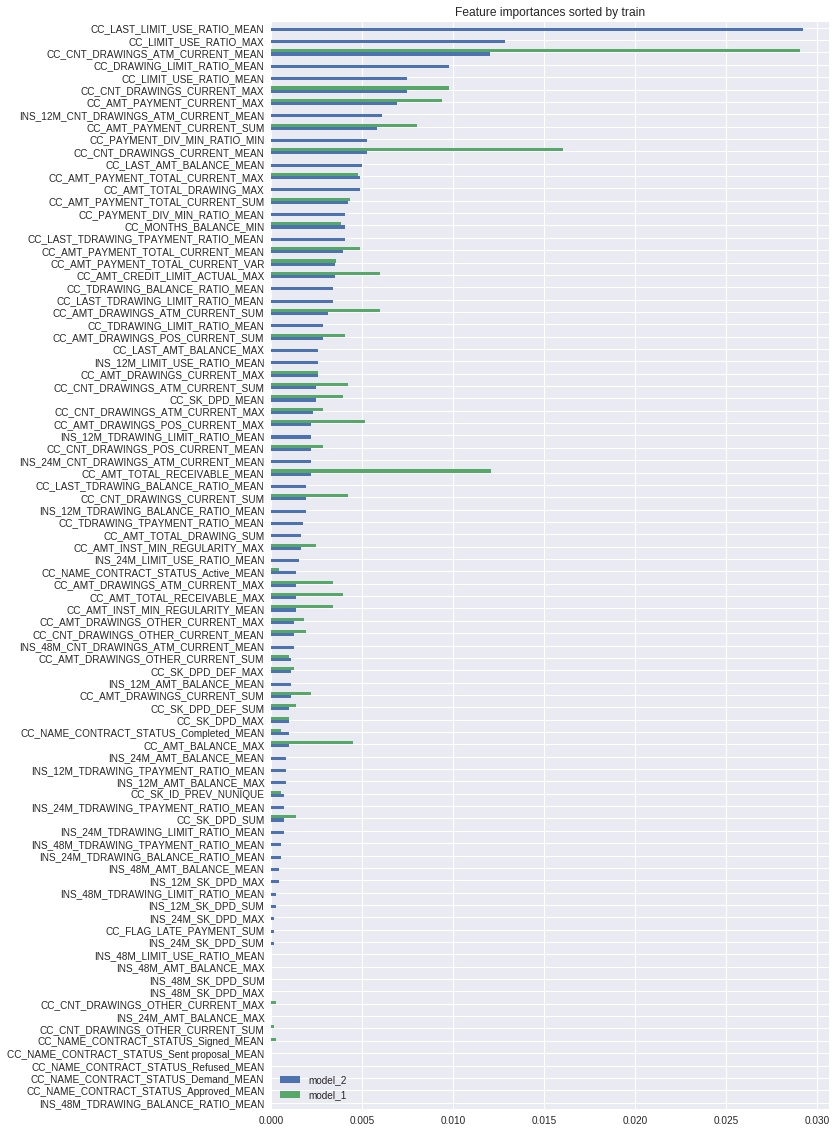

In [0]:
ax = imp.sort_values('model_2').plot.barh(
    title='Feature importances sorted by train', figsize=(10,20))

In [0]:
# Drop some less-information features
imp[imp['model_2'] == 0].index

Index(['CC_CNT_DRAWINGS_OTHER_CURRENT_MAX',
       'CC_CNT_DRAWINGS_OTHER_CURRENT_SUM',
       'CC_NAME_CONTRACT_STATUS_Approved_MEAN',
       'CC_NAME_CONTRACT_STATUS_Demand_MEAN',
       'CC_NAME_CONTRACT_STATUS_Refused_MEAN',
       'CC_NAME_CONTRACT_STATUS_Sent proposal_MEAN',
       'CC_NAME_CONTRACT_STATUS_Signed_MEAN', 'INS_24M_AMT_BALANCE_MAX',
       'INS_48M_SK_DPD_MAX', 'INS_48M_SK_DPD_SUM', 'INS_48M_AMT_BALANCE_MAX',
       'INS_48M_LIMIT_USE_RATIO_MEAN', 'INS_48M_TDRAWING_BALANCE_RATIO_MEAN'],
      dtype='object')

In [0]:
# feature_names = X_1.columns
# imp = pd.DataFrame(index=feature_names)
# imp['model_1'] = pd.Series(xgb_model_1.feature_importances_, index=feature_names)
# imp = imp.fillna(0)

# cc_cols = cc.columns
# imp = imp[imp.index.isin(cc_cols)]

# ax = imp.sort_values('model_1').plot.barh(
#     title='Feature importances sorted by train', figsize=(10,20))